Installing Libraries

In [1]:
%pip install numpy
%pip install pandas
%pip install matplotlib
%pip install seaborn
%pip install scikit-learn
%pip install fuzzywuzzy
%pip install python-Levenshtein

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


Importing necessary libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

Read CSV file

In [3]:
data = pd.read_csv('Datasets/exercises.csv')

First 5 data of dataset

In [4]:
data.head()

,bodyPart,equipment,gifUrl,id,name,target,secondaryMuscles/0,secondaryMuscles/1,instructions/0,instructions/1,...,instructions/5,secondaryMuscles/2,instructions/6,instructions/7,secondaryMuscles/3,instructions/8,secondaryMuscles/4,instructions/9,secondaryMuscles/5,instructions/10
0,waist,body weight,https://v2.exercisedb.io/image/MOnK4iG0MEt9h8,1,3/4 sit-up,abs,hip flexors,lower back,Lie flat on your back with your knees bent and...,Place your hands behind your head with your el...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,waist,body weight,https://v2.exercisedb.io/image/PERWLDGUxVbpHS,2,45° side bend,abs,obliques,NaN,Stand with your feet shoulder-width apart and ...,Keeping your back straight and your core engag...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,waist,body weight,https://v2.exercisedb.io/image/PLr4yo3j-f1amp,3,air bike,abs,hip flexors,NaN,Lie flat on your back with your hands placed b...,Lift your legs off the ground and bend your kn...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,upper legs,body weight,https://v2.exercisedb.io/image/XPQwM7HECjgNFE,1512,all fours squad stretch,quads,hamstrings,glutes,Start on all fours with your hands directly un...,"Extend one leg straight back, keeping your kne...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,waist,body weight,https://v2.exercisedb.io/image/5nYph4eUGNiEdf,6,alternate heel touchers,abs,obliques,NaN,Lie flat on your back with your knees bent and...,"Extend your arms straight out to the sides, pa...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
data.shape

(1324, 23)

Check for null values in dataset

In [6]:
data.isnull()

,bodyPart,equipment,gifUrl,id,name,target,secondaryMuscles/0,secondaryMuscles/1,instructions/0,instructions/1,...,instructions/5,secondaryMuscles/2,instructions/6,instructions/7,secondaryMuscles/3,instructions/8,secondaryMuscles/4,instructions/9,secondaryMuscles/5,instructions/10
0,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
1,False,False,False,False,False,False,False,True,False,False,...,True,True,True,True,True,True,True,True,True,True
2,False,False,False,False,False,False,False,True,False,False,...,True,True,True,True,True,True,True,True,True,True
3,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
4,False,False,False,False,False,False,False,True,False,False,...,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1319,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
1320,False,False,False,False,False,False,False,False,False,False,...,True,False,True,True,True,True,True,True,True,True
1321,False,False,False,False,False,False,False,False,False,False,...,False,False,True,True,True,True,True,True,True,True
1322,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True


Total of null values


In [7]:
data.isnull().sum()

bodyPart                 0
equipment                0
gifUrl                   0
id                       0
name                     0
target                   0
secondaryMuscles/0       0
secondaryMuscles/1     338
instructions/0           0
instructions/1           0
instructions/2           0
instructions/3           0
instructions/4          82
instructions/5         585
secondaryMuscles/2    1091
instructions/6        1011
instructions/7        1232
secondaryMuscles/3    1292
instructions/8        1304
secondaryMuscles/4    1320
instructions/9        1319
secondaryMuscles/5    1322
instructions/10       1321
dtype: int64

Info of dataset

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1324 entries, 0 to 1323
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   bodyPart            1324 non-null   object
 1   equipment           1324 non-null   object
 2   gifUrl              1324 non-null   object
 3   id                  1324 non-null   int64 
 4   name                1324 non-null   object
 5   target              1324 non-null   object
 6   secondaryMuscles/0  1324 non-null   object
 7   secondaryMuscles/1  986 non-null    object
 8   instructions/0      1324 non-null   object
 9   instructions/1      1324 non-null   object
 10  instructions/2      1324 non-null   object
 11  instructions/3      1324 non-null   object
 12  instructions/4      1242 non-null   object
 13  instructions/5      739 non-null    object
 14  secondaryMuscles/2  233 non-null    object
 15  instructions/6      313 non-null    object
 16  instructions/7      92 n

Heatmap for null values in columns

<Axes: >

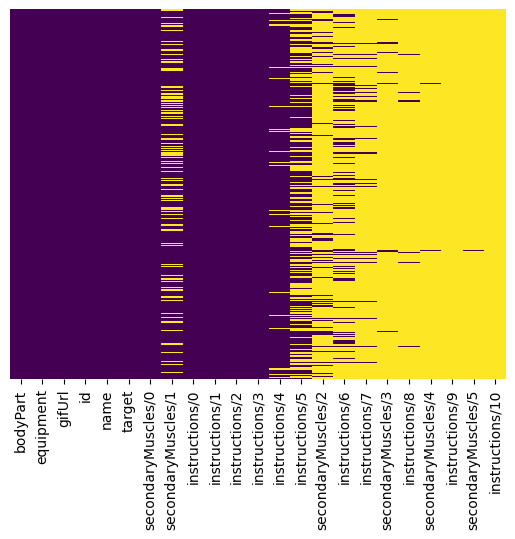

In [9]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Join secondaryMuscle columns into one column

In [10]:
selected_columns = ['secondaryMuscles/0', 'secondaryMuscles/1', 'secondaryMuscles/2', 'secondaryMuscles/3', 'secondaryMuscles/4', 'secondaryMuscles/5']

data['secondaryMuscles'] = data[selected_columns].apply(lambda x: ', '.join(x.dropna().astype(str)), axis=1)

Drop unnecessary secondaryMuscle columns

In [11]:
data.drop(columns=selected_columns, inplace=True)

In [12]:
data.head()

,bodyPart,equipment,gifUrl,id,name,target,instructions/0,instructions/1,instructions/2,instructions/3,instructions/4,instructions/5,instructions/6,instructions/7,instructions/8,instructions/9,instructions/10,secondaryMuscles
0,waist,body weight,https://v2.exercisedb.io/image/MOnK4iG0MEt9h8,1,3/4 sit-up,abs,Lie flat on your back with your knees bent and...,Place your hands behind your head with your el...,"Engaging your abs, slowly lift your upper body...","Pause for a moment at the top, then slowly low...",Repeat for the desired number of repetitions.,NaN,NaN,NaN,NaN,NaN,NaN,"hip flexors, lower back"
1,waist,body weight,https://v2.exercisedb.io/image/PERWLDGUxVbpHS,2,45° side bend,abs,Stand with your feet shoulder-width apart and ...,Keeping your back straight and your core engag...,"Pause for a moment at the bottom, then slowly ...",Repeat on the other side.,Continue alternating sides for the desired num...,NaN,NaN,NaN,NaN,NaN,NaN,obliques
2,waist,body weight,https://v2.exercisedb.io/image/PLr4yo3j-f1amp,3,air bike,abs,Lie flat on your back with your hands placed b...,Lift your legs off the ground and bend your kn...,Bring your right elbow towards your left knee ...,Return to the starting position and repeat the...,Continue alternating sides in a pedaling motio...,NaN,NaN,NaN,NaN,NaN,NaN,hip flexors
3,upper legs,body weight,https://v2.exercisedb.io/image/XPQwM7HECjgNFE,1512,all fours squad stretch,quads,Start on all fours with your hands directly un...,"Extend one leg straight back, keeping your kne...","Slowly lower your hips towards the ground, fee...",Hold this position for 20-30 seconds.,Switch legs and repeat the stretch on the othe...,NaN,NaN,NaN,NaN,NaN,NaN,"hamstrings, glutes"
4,waist,body weight,https://v2.exercisedb.io/image/5nYph4eUGNiEdf,6,alternate heel touchers,abs,Lie flat on your back with your knees bent and...,"Extend your arms straight out to the sides, pa...","Engaging your abs, lift your shoulders off the...",Return to the starting position and repeat on ...,Continue alternating sides for the desired num...,NaN,NaN,NaN,NaN,NaN,NaN,obliques


Heatmap after secondaryMuscles cleaning

<Axes: >

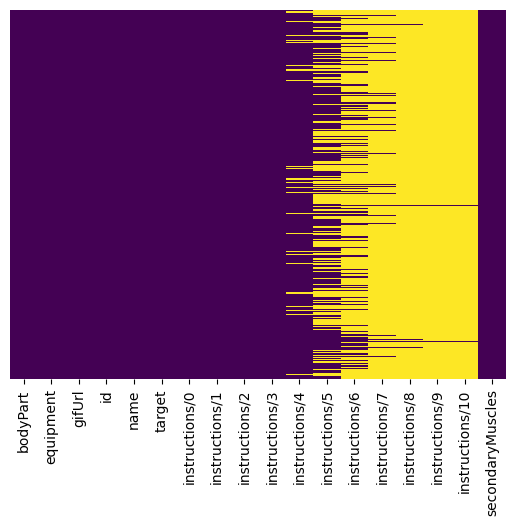

In [13]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Join instructions columns into one column

In [14]:
selected_columns = ['instructions/0', 'instructions/1', 'instructions/2', 'instructions/3', 'instructions/4', 'instructions/5', 'instructions/6', 'instructions/7', 'instructions/8', 'instructions/9', 'instructions/10']

data['instructions'] = data[selected_columns].apply(lambda x: ' '.join(x.dropna().astype(str)), axis=1)

In [15]:
data.head()

,bodyPart,equipment,gifUrl,id,name,target,instructions/0,instructions/1,instructions/2,instructions/3,instructions/4,instructions/5,instructions/6,instructions/7,instructions/8,instructions/9,instructions/10,secondaryMuscles,instructions
0,waist,body weight,https://v2.exercisedb.io/image/MOnK4iG0MEt9h8,1,3/4 sit-up,abs,Lie flat on your back with your knees bent and...,Place your hands behind your head with your el...,"Engaging your abs, slowly lift your upper body...","Pause for a moment at the top, then slowly low...",Repeat for the desired number of repetitions.,NaN,NaN,NaN,NaN,NaN,NaN,"hip flexors, lower back",Lie flat on your back with your knees bent and...
1,waist,body weight,https://v2.exercisedb.io/image/PERWLDGUxVbpHS,2,45° side bend,abs,Stand with your feet shoulder-width apart and ...,Keeping your back straight and your core engag...,"Pause for a moment at the bottom, then slowly ...",Repeat on the other side.,Continue alternating sides for the desired num...,NaN,NaN,NaN,NaN,NaN,NaN,obliques,Stand with your feet shoulder-width apart and ...
2,waist,body weight,https://v2.exercisedb.io/image/PLr4yo3j-f1amp,3,air bike,abs,Lie flat on your back with your hands placed b...,Lift your legs off the ground and bend your kn...,Bring your right elbow towards your left knee ...,Return to the starting position and repeat the...,Continue alternating sides in a pedaling motio...,NaN,NaN,NaN,NaN,NaN,NaN,hip flexors,Lie flat on your back with your hands placed b...
3,upper legs,body weight,https://v2.exercisedb.io/image/XPQwM7HECjgNFE,1512,all fours squad stretch,quads,Start on all fours with your hands directly un...,"Extend one leg straight back, keeping your kne...","Slowly lower your hips towards the ground, fee...",Hold this position for 20-30 seconds.,Switch legs and repeat the stretch on the othe...,NaN,NaN,NaN,NaN,NaN,NaN,"hamstrings, glutes",Start on all fours with your hands directly un...
4,waist,body weight,https://v2.exercisedb.io/image/5nYph4eUGNiEdf,6,alternate heel touchers,abs,Lie flat on your back with your knees bent and...,"Extend your arms straight out to the sides, pa...","Engaging your abs, lift your shoulders off the...",Return to the starting position and repeat on ...,Continue alternating sides for the desired num...,NaN,NaN,NaN,NaN,NaN,NaN,obliques,Lie flat on your back with your knees bent and...


Drop unnecessary instructions columns

In [16]:
data.drop(columns=selected_columns, inplace=True)

Final dataset after cleaning

In [17]:
data.head()

,bodyPart,equipment,gifUrl,id,name,target,secondaryMuscles,instructions
0,waist,body weight,https://v2.exercisedb.io/image/MOnK4iG0MEt9h8,1,3/4 sit-up,abs,"hip flexors, lower back",Lie flat on your back with your knees bent and...
1,waist,body weight,https://v2.exercisedb.io/image/PERWLDGUxVbpHS,2,45° side bend,abs,obliques,Stand with your feet shoulder-width apart and ...
2,waist,body weight,https://v2.exercisedb.io/image/PLr4yo3j-f1amp,3,air bike,abs,hip flexors,Lie flat on your back with your hands placed b...
3,upper legs,body weight,https://v2.exercisedb.io/image/XPQwM7HECjgNFE,1512,all fours squad stretch,quads,"hamstrings, glutes",Start on all fours with your hands directly un...
4,waist,body weight,https://v2.exercisedb.io/image/5nYph4eUGNiEdf,6,alternate heel touchers,abs,obliques,Lie flat on your back with your knees bent and...


<Axes: >

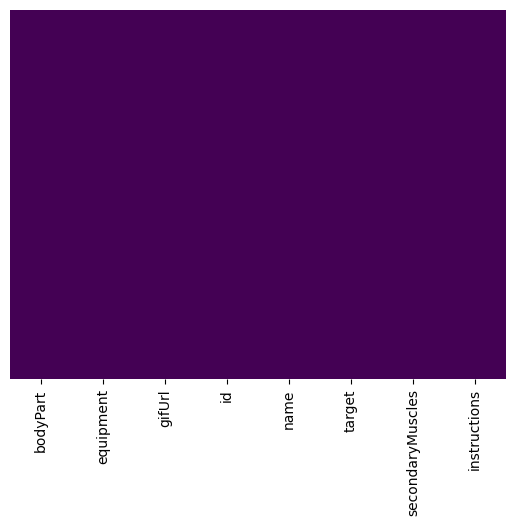

In [18]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1324 entries, 0 to 1323
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   bodyPart          1324 non-null   object
 1   equipment         1324 non-null   object
 2   gifUrl            1324 non-null   object
 3   id                1324 non-null   int64 
 4   name              1324 non-null   object
 5   target            1324 non-null   object
 6   secondaryMuscles  1324 non-null   object
 7   instructions      1324 non-null   object
dtypes: int64(1), object(7)
memory usage: 82.9+ KB


In [20]:
data.drop(columns='id', inplace=True)

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1324 entries, 0 to 1323
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   bodyPart          1324 non-null   object
 1   equipment         1324 non-null   object
 2   gifUrl            1324 non-null   object
 3   name              1324 non-null   object
 4   target            1324 non-null   object
 5   secondaryMuscles  1324 non-null   object
 6   instructions      1324 non-null   object
dtypes: object(7)
memory usage: 72.5+ KB


In [22]:
data.head()

,bodyPart,equipment,gifUrl,name,target,secondaryMuscles,instructions
0,waist,body weight,https://v2.exercisedb.io/image/MOnK4iG0MEt9h8,3/4 sit-up,abs,"hip flexors, lower back",Lie flat on your back with your knees bent and...
1,waist,body weight,https://v2.exercisedb.io/image/PERWLDGUxVbpHS,45° side bend,abs,obliques,Stand with your feet shoulder-width apart and ...
2,waist,body weight,https://v2.exercisedb.io/image/PLr4yo3j-f1amp,air bike,abs,hip flexors,Lie flat on your back with your hands placed b...
3,upper legs,body weight,https://v2.exercisedb.io/image/XPQwM7HECjgNFE,all fours squad stretch,quads,"hamstrings, glutes",Start on all fours with your hands directly un...
4,waist,body weight,https://v2.exercisedb.io/image/5nYph4eUGNiEdf,alternate heel touchers,abs,obliques,Lie flat on your back with your knees bent and...


In [23]:
data['id'] = data['id'].str.replace(r'\W+', '')

KeyError: 'id'

Plot for bodyPart column

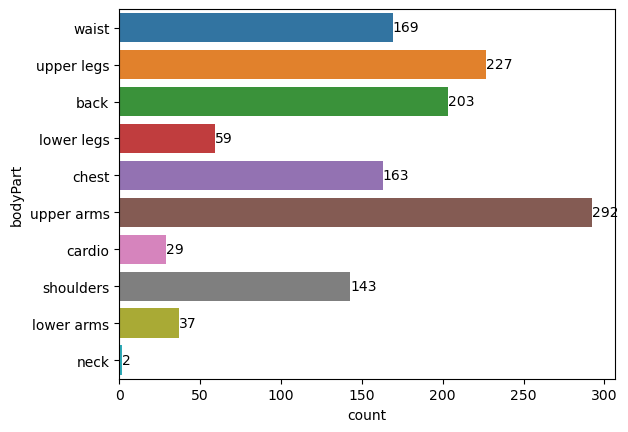

In [ ]:
ax = sns.countplot(data=data,y='bodyPart')
ax.bar_label(ax.containers[0])
plt.show()

Plot for equipment column

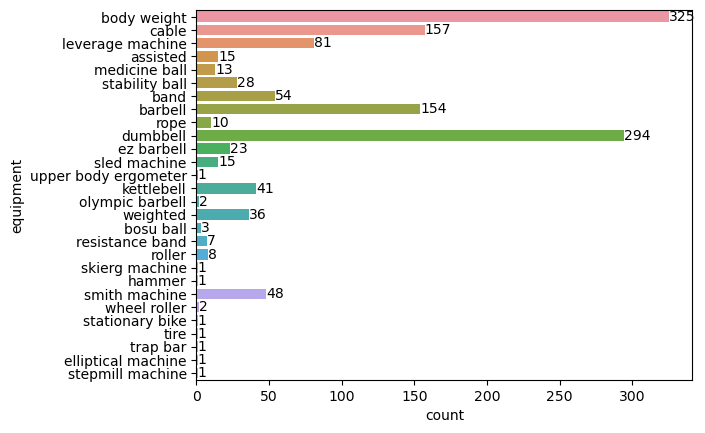

In [ ]:
ax = sns.countplot(data=data,y='equipment')
ax.bar_label(ax.containers[0])
plt.show()

Plot for target column

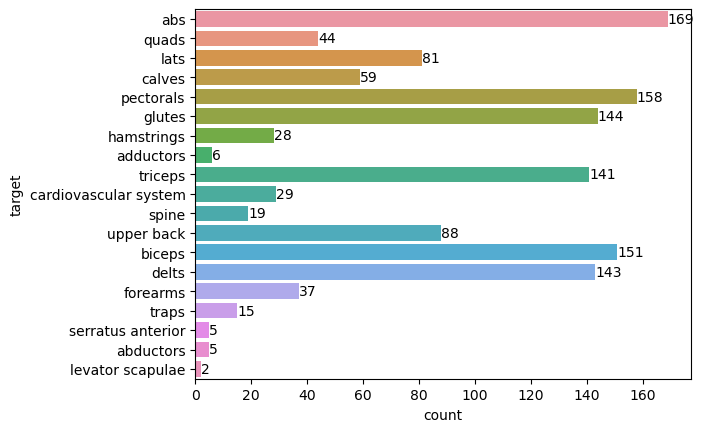

In [ ]:
ax = sns.countplot(data=data,y='target')
ax.bar_label(ax.containers[0])
plt.show()

Filter bodyPart 'waist' data distribution in the dataset 

In [ ]:
waist_data = data[data['bodyPart'] == 'waist']
waist_data.head()

,bodyPart,equipment,gifUrl,id,name,target,secondaryMuscles,instructions
0,waist,body weight,https://v2.exercisedb.io/image/MOnK4iG0MEt9h8,1,3/4 sit-up,abs,"hip flexors, lower back",Lie flat on your back with your knees bent and...
1,waist,body weight,https://v2.exercisedb.io/image/PERWLDGUxVbpHS,2,45° side bend,abs,obliques,Stand with your feet shoulder-width apart and ...
2,waist,body weight,https://v2.exercisedb.io/image/PLr4yo3j-f1amp,3,air bike,abs,hip flexors,Lie flat on your back with your hands placed b...
4,waist,body weight,https://v2.exercisedb.io/image/5nYph4eUGNiEdf,6,alternate heel touchers,abs,obliques,Lie flat on your back with your knees bent and...
9,waist,body weight,https://v2.exercisedb.io/image/osybi41Me6RFK2,2355,arm slingers hanging bent knee legs,abs,"shoulders, back",Hang from a pull-up bar with your arms fully e...


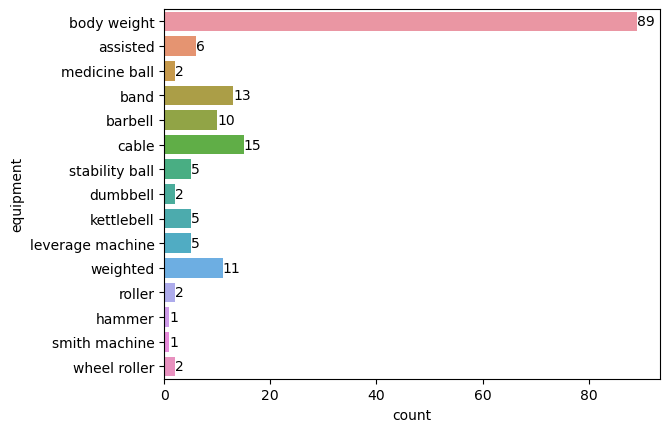

In [ ]:
ax = sns.countplot(data=waist_data,y='equipment')
ax.bar_label(ax.containers[0])
plt.show()

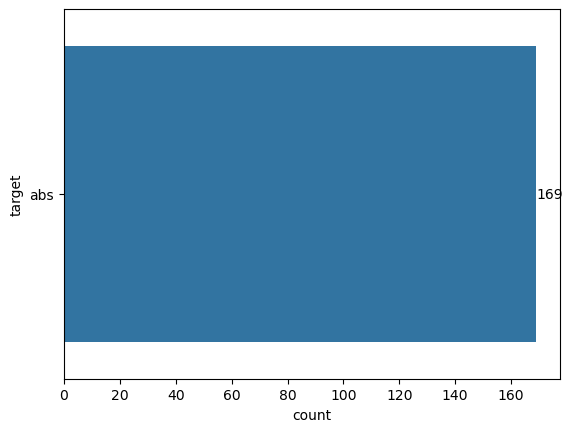

In [ ]:
ax = sns.countplot(data=waist_data,y='target')
ax.bar_label(ax.containers[0])
plt.show()

Filter bodyPart 'upper legs' data distribution in the dataset 

In [ ]:
upper_legs_data = data[data['bodyPart'] == 'upper legs']
upper_legs_data.head()

,bodyPart,equipment,gifUrl,id,name,target,secondaryMuscles,instructions
3,upper legs,body weight,https://v2.exercisedb.io/image/XPQwM7HECjgNFE,1512,all fours squad stretch,quads,"hamstrings, glutes",Start on all fours with your hands directly un...
11,upper legs,body weight,https://v2.exercisedb.io/image/sGs-MoFgyniLX4,3214,arms apart circular toe touch (male),glutes,"hamstrings, quadriceps, calves",Stand with your feet shoulder-width apart and ...
17,upper legs,assisted,https://v2.exercisedb.io/image/pIPCvG-7PYwJyb,1709,assisted lying glutes stretch,glutes,hamstrings,Lie on your back with your legs extended. Bend...
18,upper legs,assisted,https://v2.exercisedb.io/image/re-rcIyamJTP9k,1710,assisted lying gluteus and piriformis stretch,glutes,hamstrings,Lie on your back with your legs extended. Bend...
23,upper legs,assisted,https://v2.exercisedb.io/image/ytpSbFtNhvVICC,16,assisted prone hamstring,hamstrings,"glutes, lower back",Lie face down on a mat or bench with your legs...


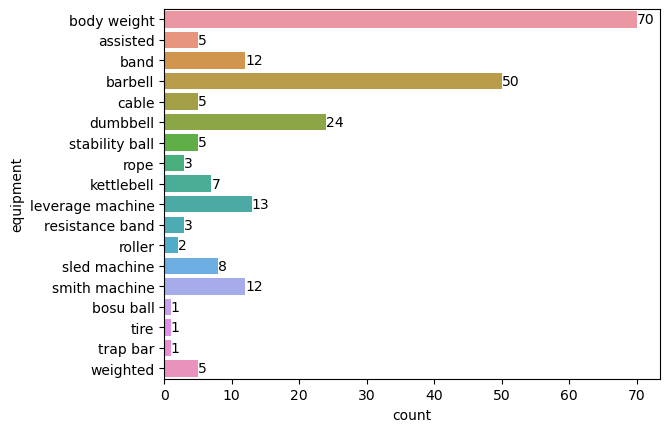

In [ ]:
ax = sns.countplot(data=upper_legs_data,y='equipment')
ax.bar_label(ax.containers[0])
plt.show()

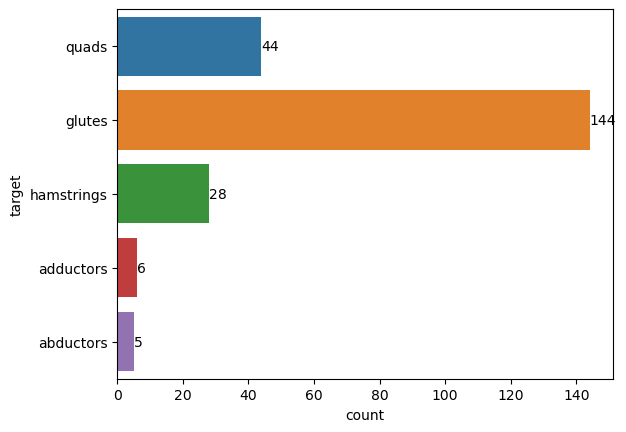

In [ ]:
ax = sns.countplot(data=upper_legs_data,y='target')
ax.bar_label(ax.containers[0])
plt.show()

Filter bodyPart 'back' data distribution in the dataset 

In [ ]:
back_data = data[data['bodyPart'] == 'back']
back_data.head()

,bodyPart,equipment,gifUrl,id,name,target,secondaryMuscles,instructions
5,back,cable,https://v2.exercisedb.io/image/Az5UYVYNa4j-oS,7,alternate lateral pulldown,lats,"biceps, rhomboids",Sit on the cable machine with your back straig...
7,back,body weight,https://v2.exercisedb.io/image/LSBkdKcbK4xj8n,3293,archer pull up,lats,"biceps, forearms",Start by hanging from a pull-up bar with an ov...
22,back,leverage machine,https://v2.exercisedb.io/image/dV2Lj3p2pfkt4c,15,assisted parallel close grip pull-up,lats,"biceps, forearms",Adjust the machine to your desired weight and ...
26,back,leverage machine,https://v2.exercisedb.io/image/rFSbsEA3x-wTKy,17,assisted pull-up,lats,"biceps, forearms",Adjust the machine to your desired weight and ...
30,back,leverage machine,https://v2.exercisedb.io/image/iD6I6vHUV4flxZ,1431,assisted standing chin-up,lats,"biceps, forearms",Adjust the machine to your desired assistance ...


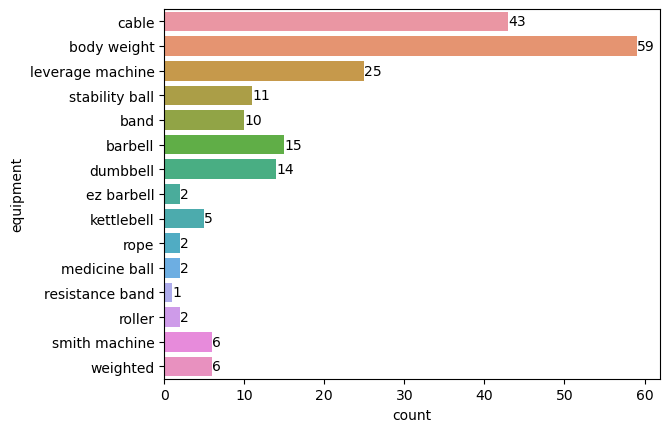

In [ ]:
ax = sns.countplot(data=back_data,y='equipment')
ax.bar_label(ax.containers[0])
plt.show()

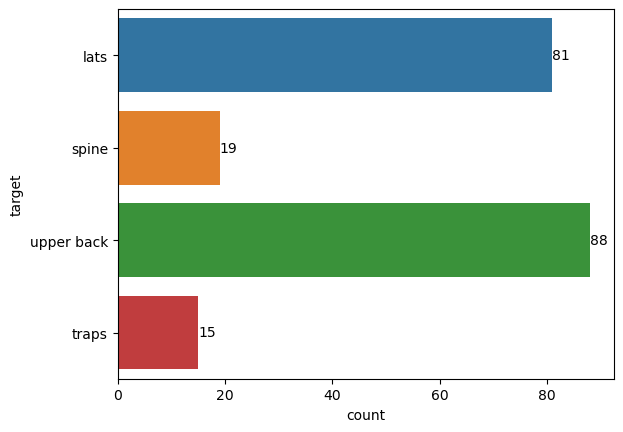

In [ ]:
ax = sns.countplot(data=back_data,y='target')
ax.bar_label(ax.containers[0])
plt.show()

Filter bodyPart 'lower legs' data distribution in the dataset 

In [ ]:
lower_legs_data = data[data['bodyPart'] == 'lower legs']
lower_legs_data.head()

,bodyPart,equipment,gifUrl,id,name,target,secondaryMuscles,instructions
6,lower legs,body weight,https://v2.exercisedb.io/image/ivmTcSJsMlXJeK,1368,ankle circles,calves,ankle stabilizers,Sit on the ground with your legs extended in f...
16,lower legs,assisted,https://v2.exercisedb.io/image/FHWElls92kFz7u,1708,assisted lying calves stretch,calves,hamstrings,Lie on your back with your legs extended. Bend...
77,lower legs,band,https://v2.exercisedb.io/image/tgDhZRp45npWII,999,band single leg calf raise,calves,"ankles, feet",Stand with your feet hip-width apart and place...
78,lower legs,band,https://v2.exercisedb.io/image/r1buBLtWssfNHS,1000,band single leg reverse calf raise,calves,"hamstrings, glutes",Stand with your feet hip-width apart and place...
90,lower legs,band,https://v2.exercisedb.io/image/TrXQWKtgFRJuDh,1369,band two legs calf raise - (band under both le...,calves,"ankles, feet",Stand with your feet shoulder-width apart and ...


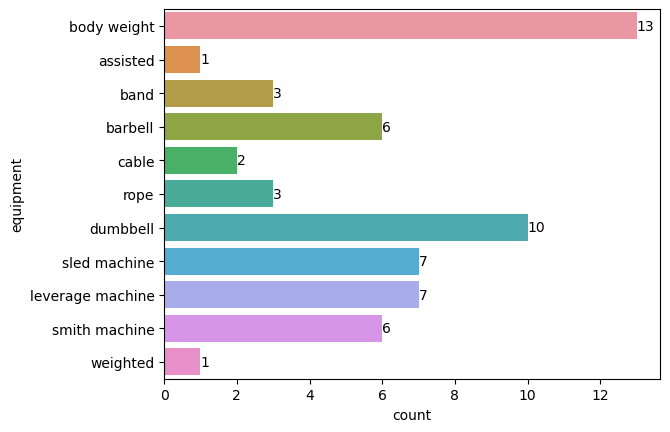

In [ ]:
ax = sns.countplot(data=lower_legs_data,y='equipment')
ax.bar_label(ax.containers[0])
plt.show()

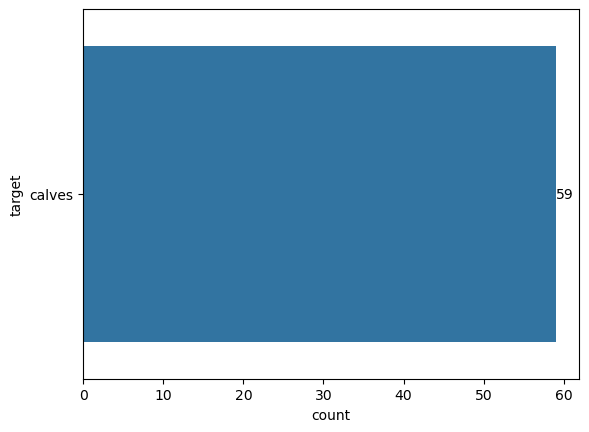

In [ ]:
ax = sns.countplot(data=lower_legs_data,y='target')
ax.bar_label(ax.containers[0])
plt.show()

Filter bodyPart 'back' data distribution in the dataset 

In [ ]:
chest_data = data[data['bodyPart'] == 'chest']
chest_data.head()

,bodyPart,equipment,gifUrl,id,name,target,secondaryMuscles,instructions
8,chest,body weight,https://v2.exercisedb.io/image/GSjHZGSiL1VbQ7,3294,archer push up,pectorals,"triceps, shoulders, core",Start in a push-up position with your hands sl...
13,chest,leverage machine,https://v2.exercisedb.io/image/AbxK1fjW5YdIBj,9,assisted chest dip (kneeling),pectorals,"triceps, shoulders",Adjust the machine to your desired height and ...
27,chest,assisted,https://v2.exercisedb.io/image/V4PlYYE0rlK7tY,1716,assisted seated pectoralis major stretch with ...,pectorals,"shoulders, triceps",Sit on a stability ball with your feet flat on...
34,chest,leverage machine,https://v2.exercisedb.io/image/9RWiaQoGBGogXv,2364,assisted wide-grip chest dip (kneeling),pectorals,"triceps, shoulders",Adjust the machine to your desired height and ...
46,chest,band,https://v2.exercisedb.io/image/oyWqo0D8zSMbyD,1254,band bench press,pectorals,"triceps, shoulders",Lie flat on a bench with your feet flat on the...


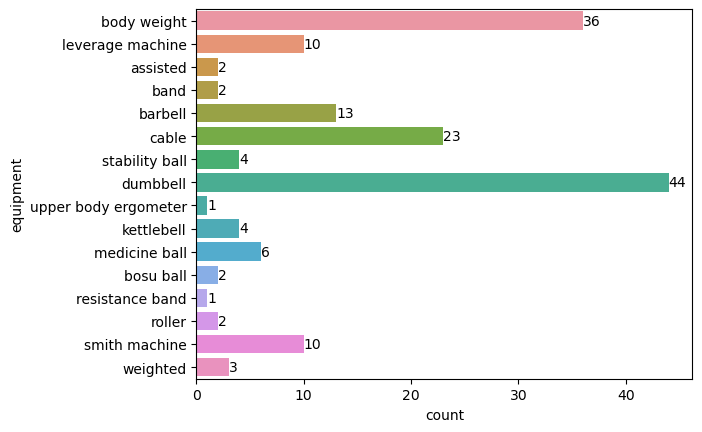

In [ ]:
ax = sns.countplot(data=chest_data,y='equipment')
ax.bar_label(ax.containers[0])
plt.show()

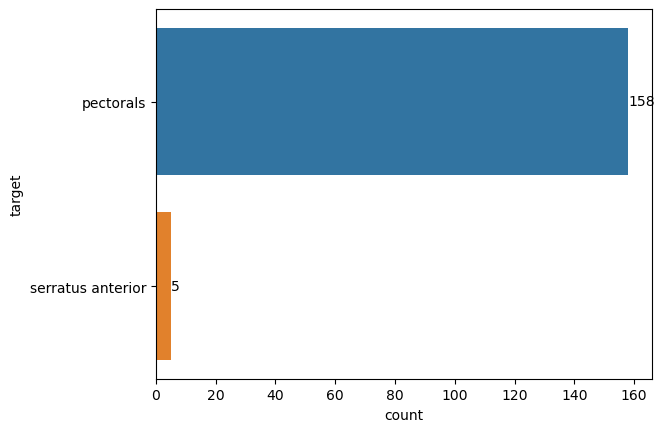

In [ ]:
ax = sns.countplot(data=chest_data,y='target')
ax.bar_label(ax.containers[0])
plt.show()

Filter bodyPart 'upper arms' data distribution in the dataset 

In [ ]:
upper_arms_data = data[data['bodyPart'] == 'upper arms']
upper_arms_data.head()

,bodyPart,equipment,gifUrl,id,name,target,secondaryMuscles,instructions
32,upper arms,assisted,https://v2.exercisedb.io/image/qnqFpisTx9R-gB,18,assisted standing triceps extension (with towel),triceps,shoulders,Stand with your feet shoulder-width apart and ...
33,upper arms,leverage machine,https://v2.exercisedb.io/image/Wr9I3UD5-miI3Y,19,assisted triceps dip (kneeling),triceps,"chest, shoulders",Adjust the machine to your desired weight and ...
42,upper arms,band,https://v2.exercisedb.io/image/y5DNwJsa0ZCGV3,968,band alternating biceps curl,biceps,forearms,Stand with your feet shoulder-width apart and ...
50,upper arms,band,https://v2.exercisedb.io/image/bepXYwVrQpSP7W,975,band close-grip push-up,triceps,"chest, shoulders","Place a band around your upper arms, just abov..."
51,upper arms,band,https://v2.exercisedb.io/image/-FDJYdjMlHuHvl,976,band concentration curl,biceps,forearms,Sit on a bench or chair with your legs spread ...


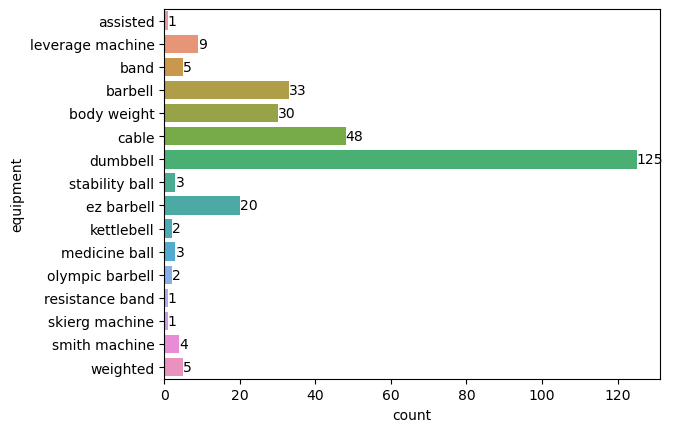

In [ ]:
ax = sns.countplot(data=upper_arms_data,y='equipment')
ax.bar_label(ax.containers[0])
plt.show()

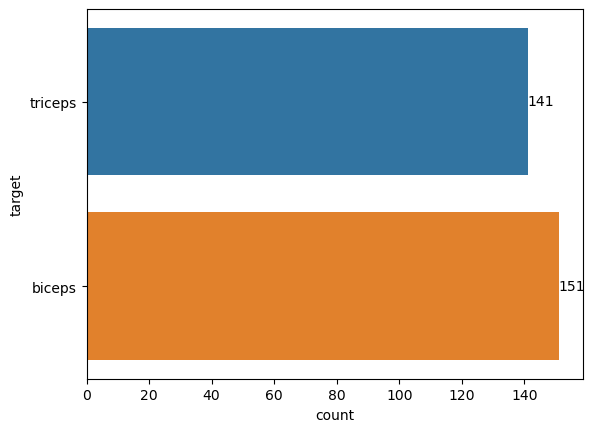

In [ ]:
ax = sns.countplot(data=upper_arms_data,y='target')
ax.bar_label(ax.containers[0])
plt.show()

Filter bodyPart 'cardio' data distribution in the dataset 

In [ ]:
cardio_data = data[data['bodyPart'] == 'cardio']
cardio_data.head()

,bodyPart,equipment,gifUrl,id,name,target,secondaryMuscles,instructions
35,cardio,body weight,https://v2.exercisedb.io/image/GzvxMK5EkJ6H43,3220,astride jumps (male),cardiovascular system,"quadriceps, hamstrings, calves",Stand with your feet shoulder-width apart. Ben...
36,cardio,body weight,https://v2.exercisedb.io/image/akGmnMj1gqgJU3,3672,back and forth step,cardiovascular system,"quadriceps, hamstrings, glutes, calves",Stand with your feet shoulder-width apart. Ste...
239,cardio,body weight,https://v2.exercisedb.io/image/CU7ulGA569adpS,3360,bear crawl,cardiovascular system,"core, shoulders, triceps",Start on all fours with your hands directly un...
266,cardio,body weight,https://v2.exercisedb.io/image/Ouk-Qv9vZOZdwd,1160,burpee,cardiovascular system,"quadriceps, hamstrings, calves, shoulders, chest",Start in a standing position with your feet sh...
453,cardio,leverage machine,https://v2.exercisedb.io/image/eqnA9tzuKcNB5k,2331,cycle cross trainer,cardiovascular system,"quadriceps, hamstrings, glutes",Adjust the seat height and position yourself o...


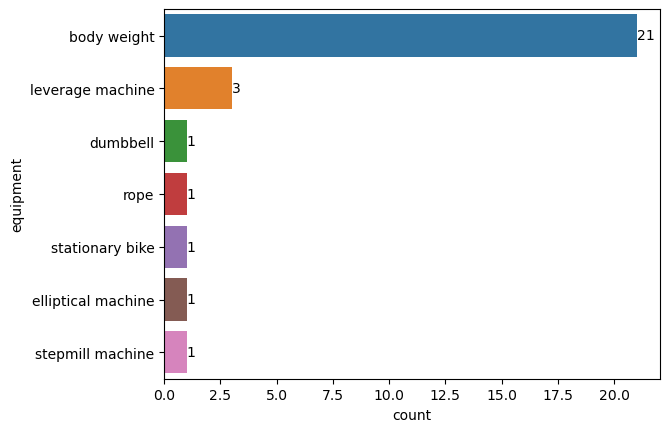

In [ ]:
ax = sns.countplot(data=cardio_data,y='equipment')
ax.bar_label(ax.containers[0])
plt.show()

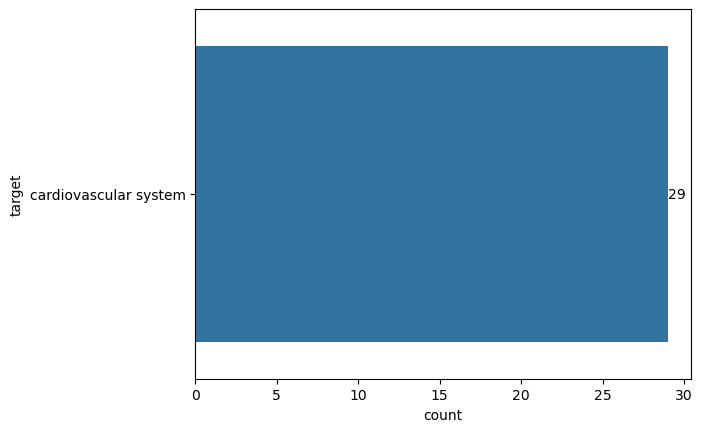

In [ ]:
ax = sns.countplot(data=cardio_data,y='target')
ax.bar_label(ax.containers[0])
plt.show()

Filter bodyPart 'shoulders' data distribution in the dataset 

In [ ]:
shoulders_data = data[data['bodyPart'] == 'shoulders']
shoulders_data.head()

,bodyPart,equipment,gifUrl,id,name,target,secondaryMuscles,instructions
54,shoulders,band,https://v2.exercisedb.io/image/Lnwg2eVOyiGGH1,977,band front lateral raise,delts,"traps, upper back",Stand with your feet shoulder-width apart and ...
55,shoulders,band,https://v2.exercisedb.io/image/jbfxRRc0JKrcCT,978,band front raise,delts,"triceps, upper back",Stand with your feet shoulder-width apart and ...
70,shoulders,band,https://v2.exercisedb.io/image/1Tsu9UbqOeYcwr,993,band reverse fly,delts,"upper back, trapezius",Attach the band to a stationary object at ches...
74,shoulders,band,https://v2.exercisedb.io/image/t9gbH8wqasEmb0,997,band shoulder press,delts,"triceps, upper back",Stand with your feet shoulder-width apart and ...
83,shoulders,band,https://v2.exercisedb.io/image/o1qy67cXNqa0S-,1022,band standing rear delt row,delts,"trapezius, rhomboids, biceps",Stand with your feet shoulder-width apart and ...


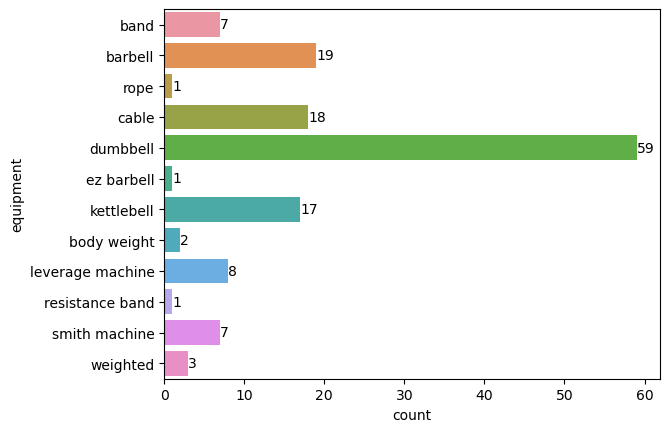

In [ ]:
ax = sns.countplot(data=shoulders_data,y='equipment')
ax.bar_label(ax.containers[0])
plt.show()

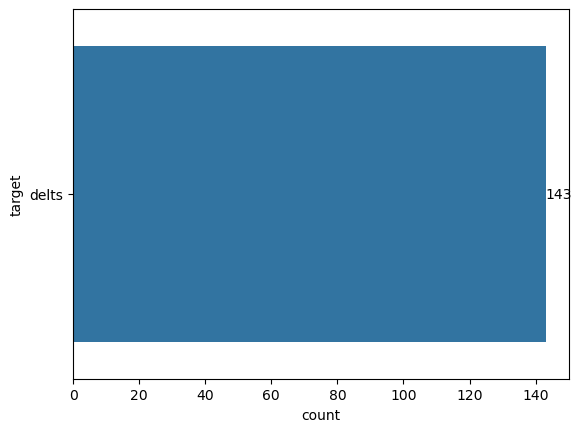

In [ ]:
ax = sns.countplot(data=shoulders_data,y='target')
ax.bar_label(ax.containers[0])
plt.show()

Filter bodyPart 'lower arms' data distribution in the dataset 

In [ ]:
lower_arms_data = data[data['bodyPart'] == 'lower arms']
lower_arms_data.head()

,bodyPart,equipment,gifUrl,id,name,target,secondaryMuscles,instructions
71,lower arms,band,https://v2.exercisedb.io/image/sP6B0BzyAwnsyC,994,band reverse wrist curl,forearms,forearms,Sit on a bench or chair with your feet flat on...
94,lower arms,band,https://v2.exercisedb.io/image/RQUBteDgupiwgl,1016,band wrist curl,forearms,"biceps, triceps",Sit on a bench or chair with your feet flat on...
156,lower arms,barbell,https://v2.exercisedb.io/image/t0FbvEEv0O7zgQ,1411,barbell palms down wrist curl over a bench,forearms,"biceps, brachialis",Sit on a bench with your feet flat on the grou...
157,lower arms,barbell,https://v2.exercisedb.io/image/MASH24WRX3M7PG,1412,barbell palms up wrist curl over a bench,forearms,"biceps, shoulders",Sit on a bench with your feet flat on the grou...
170,lower arms,barbell,https://v2.exercisedb.io/image/E2MZVcCDUbHMN9,79,barbell revers wrist curl v. 2,forearms,"biceps, brachialis",Sit on a bench with your feet flat on the grou...


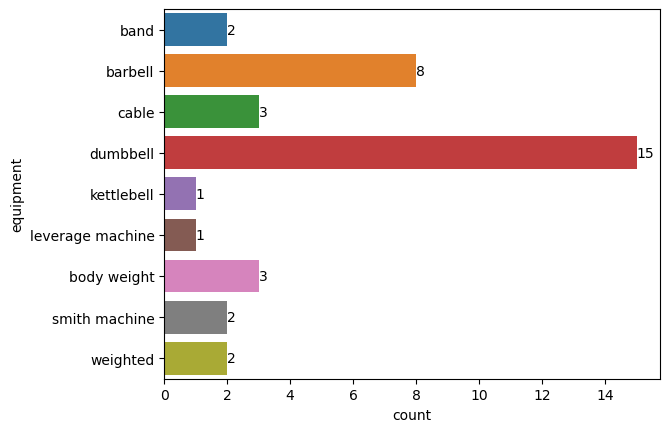

In [ ]:
ax = sns.countplot(data=lower_arms_data,y='equipment')
ax.bar_label(ax.containers[0])
plt.show()

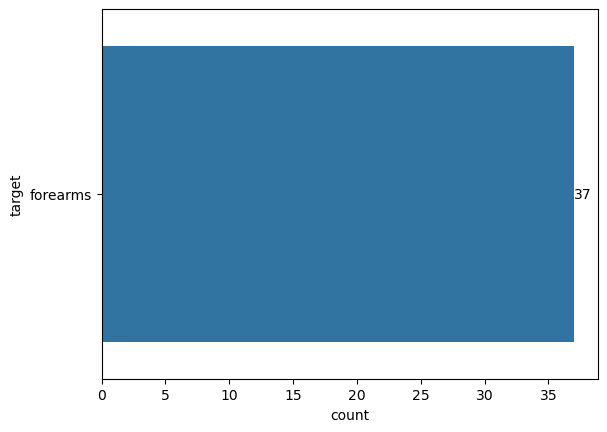

In [ ]:
ax = sns.countplot(data=lower_arms_data,y='target')
ax.bar_label(ax.containers[0])
plt.show()

Filter bodyPart 'neck' data distribution in the dataset 

In [ ]:
neck_data = data[data['bodyPart'] == 'neck']
neck_data.head()

,bodyPart,equipment,gifUrl,id,name,target,secondaryMuscles,instructions
1027,neck,body weight,https://v2.exercisedb.io/image/SYJVmmiYxfzdlI,1403,neck side stretch,levator scapulae,"trapezius, sternocleidomastoid",Stand or sit up straight with your shoulders r...
1139,neck,body weight,https://v2.exercisedb.io/image/SL03AL7XKM6M0L,716,side push neck stretch,levator scapulae,"trapezius, sternocleidomastoid",Stand or sit up straight with your shoulders r...


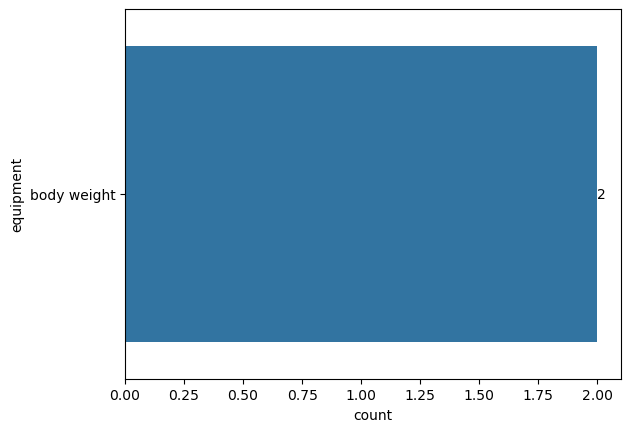

In [ ]:
ax = sns.countplot(data=neck_data,y='equipment')
ax.bar_label(ax.containers[0])
plt.show()

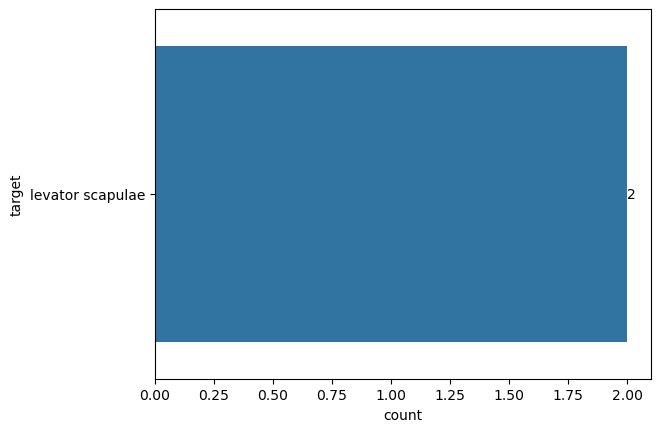

In [ ]:
ax = sns.countplot(data=neck_data,y='target')
ax.bar_label(ax.containers[0])
plt.show()

In [26]:
data.head()

,bodyPart,equipment,gifUrl,name,target,secondaryMuscles,instructions
0,waist,body weight,https://v2.exercisedb.io/image/MOnK4iG0MEt9h8,3/4 sit-up,abs,"hip flexors, lower back",Lie flat on your back with your knees bent and...
1,waist,body weight,https://v2.exercisedb.io/image/PERWLDGUxVbpHS,45° side bend,abs,obliques,Stand with your feet shoulder-width apart and ...
2,waist,body weight,https://v2.exercisedb.io/image/PLr4yo3j-f1amp,air bike,abs,hip flexors,Lie flat on your back with your hands placed b...
3,upper legs,body weight,https://v2.exercisedb.io/image/XPQwM7HECjgNFE,all fours squad stretch,quads,"hamstrings, glutes",Start on all fours with your hands directly un...
4,waist,body weight,https://v2.exercisedb.io/image/5nYph4eUGNiEdf,alternate heel touchers,abs,obliques,Lie flat on your back with your knees bent and...


In [27]:
from fuzzywuzzy import process

# List of exercise names
exercise_list = ['pushup', 'squat', 'deadlift', 'crunch', 'lunges', 'pull-up', 'plank', 'bench press', 'dumbbell curl', 'shoulder press']

# Function to find the closest matching exercise from the list
def find_closest_match(exercise_name):
    closest_match, score = process.extractOne(exercise_name, exercise_list)
    return closest_match

# Apply the function to create a new column
data['exercise_type'] = data['name'].apply(find_closest_match)

# Check the updated DataFrame with the new column
print(data.head())

     bodyPart    equipment                                         gifUrl  \
0       waist  body weight  https://v2.exercisedb.io/image/MOnK4iG0MEt9h8   
1       waist  body weight  https://v2.exercisedb.io/image/PERWLDGUxVbpHS   
2       waist  body weight  https://v2.exercisedb.io/image/PLr4yo3j-f1amp   
3  upper legs  body weight  https://v2.exercisedb.io/image/XPQwM7HECjgNFE   
4       waist  body weight  https://v2.exercisedb.io/image/5nYph4eUGNiEdf   

                      name target         secondaryMuscles  \
0               3/4 sit-up    abs  hip flexors, lower back   
1            45° side bend    abs                 obliques   
2                 air bike    abs              hip flexors   
3  all fours squad stretch  quads       hamstrings, glutes   
4  alternate heel touchers    abs                 obliques   

                                        instructions   exercise_type  
0  Lie flat on your back with your knees bent and...          pushup  
1  Stand with your fee

In [28]:
x = data[['bodyPart', 'equipment', 'target']]
y = data['name']

preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(), ['bodyPart', 'equipment', 'target'])
    ])

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', RandomForestClassifier(n_estimators=100))])

pipeline.fit(x, y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('onehot', OneHotEncoder(),
                                                  ['bodyPart', 'equipment',
                                                   'target'])])),
                ('classifier', RandomForestClassifier())])

In [29]:
x = data[['bodyPart', 'equipment', 'target']]
y = data['exercise_type']

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=40)

# Define the preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(), ['bodyPart', 'equipment', 'target'])
    ])

# Define the pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', RandomForestClassifier(n_estimators=1000))])

# Fit the pipeline on the training data
pipeline.fit(x_train, y_train)

# Generate predictions on the test set
predictions = pipeline.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, predictions))

Accuracy: 0.4377358490566038
Classification Report:
                precision    recall  f1-score   support

   bench press       0.44      0.39      0.41        54
        crunch       0.21      0.29      0.24        21
      deadlift       0.20      0.25      0.22        16
 dumbbell curl       0.62      0.84      0.71        50
        lunges       0.10      0.11      0.10        18
         plank       0.00      0.00      0.00         3
       pull-up       0.53      0.41      0.46        39
        pushup       0.50      0.36      0.42        11
shoulder press       0.12      0.08      0.10        13
         squat       0.61      0.50      0.55        40

      accuracy                           0.44       265
     macro avg       0.33      0.32      0.32       265
  weighted avg       0.44      0.44      0.43       265



/Applications/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Applications/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Applications/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [33]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

# Define the pipeline for Gradient Boosting
pipeline_gb = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', GradientBoostingClassifier())])

# Define the pipeline for Support Vector Machines (SVM)
pipeline_svm = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', SVC())])

# Define the pipeline for Neural Network
pipeline_nn = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', MLPClassifier(hidden_layer_sizes=(100,)))])  # Adjust hidden_layer_sizes as needed

# Fit the pipelines on the training data for each model
pipeline_gb.fit(x_train, y_train)
pipeline_svm.fit(x_train, y_train)
pipeline_nn.fit(x_train, y_train)

# Generate predictions on the test set for each model
predictions_gb = pipeline_gb.predict(x_test)
predictions_svm = pipeline_svm.predict(x_test)
predictions_nn = pipeline_nn.predict(x_test)

# Calculate accuracy for each model
accuracy_gb = accuracy_score(y_test, predictions_gb)
accuracy_svm = accuracy_score(y_test, predictions_svm)
accuracy_nn = accuracy_score(y_test, predictions_nn)

print("Gradient Boosting Accuracy:", accuracy_gb)
print("SVM Accuracy:", accuracy_svm)
print("Neural Network Accuracy:", accuracy_nn)


Gradient Boosting Accuracy: 0.4339622641509434
SVM Accuracy: 0.4377358490566038
Neural Network Accuracy: 0.4339622641509434


/Applications/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


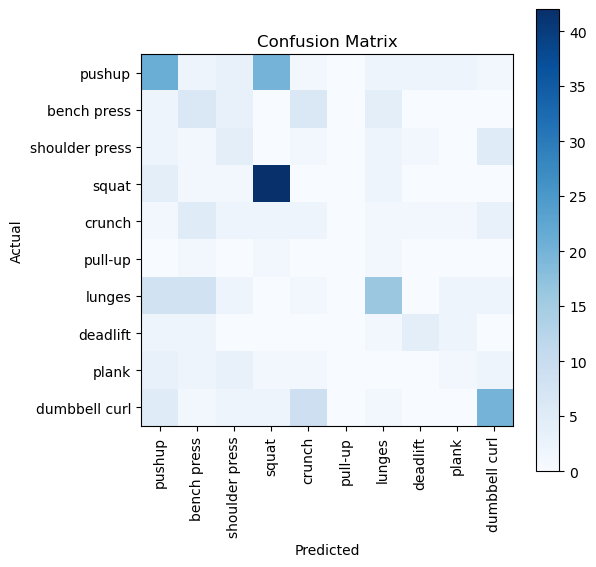

In [31]:
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test, predictions)

# Plot confusion matrix
plt.figure(figsize=(6, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

# Adding labels
classes = data['exercise_type'].unique()
plt.xticks(ticks=range(len(classes)), labels=classes, rotation='vertical')
plt.yticks(ticks=range(len(classes)), labels=classes)
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.show()

In [32]:

user_body_part = input("Enter body part: ")
user_equipment = input("Enter equipment: ")
user_target = input("Enter target muscles: ")
    

while True:
    user_data = pd.DataFrame([[user_body_part, user_equipment, user_target]], columns=['bodyPart', 'equipment', 'target'])
    predicted_exercises = pipeline.predict(user_data)

    matching_exercises = data[(data['bodyPart'] == user_body_part) & 
                                (data['equipment'] == user_equipment) & 
                                (data['target'] == user_target)]

    print("\nMatching Exercises:\n")
    for index, row in matching_exercises.iterrows():
        print("Name:", row['name'])
        print("Secondary Muscles:", row['secondaryMuscles'])
        print("Instructions:", row['instructions'])
        print("GIF URL:", row['gifUrl'])
        print()

    repeat = input("Do you want to classify another exercise? (yes/no): ")
    if repeat.lower() != 'yes':
        break


Matching Exercises:

Name: 3/4 sit-up
Secondary Muscles: hip flexors, lower back
Instructions: Lie flat on your back with your knees bent and feet flat on the ground. Place your hands behind your head with your elbows pointing outwards. Engaging your abs, slowly lift your upper body off the ground, curling forward until your torso is at a 45-degree angle. Pause for a moment at the top, then slowly lower your upper body back down to the starting position. Repeat for the desired number of repetitions.
GIF URL: https://v2.exercisedb.io/image/MOnK4iG0MEt9h8

Name: 45° side bend
Secondary Muscles: obliques
Instructions: Stand with your feet shoulder-width apart and your arms extended straight down by your sides. Keeping your back straight and your core engaged, slowly bend your torso to one side, lowering your hand towards your knee. Pause for a moment at the bottom, then slowly return to the starting position. Repeat on the other side. Continue alternating sides for the desired number of 

In [ ]:
len(matching_exercises)

89